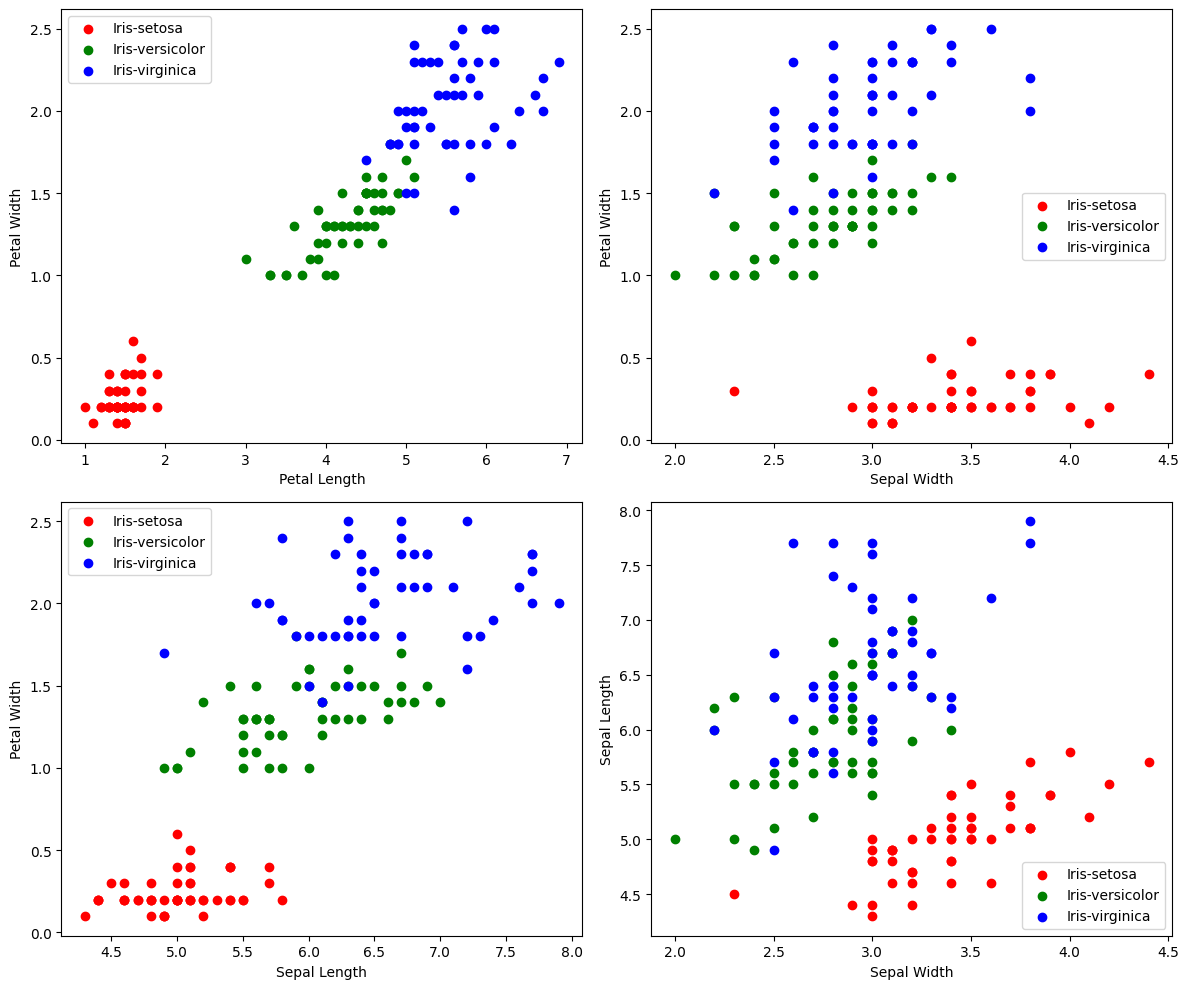

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("iris.txt", sep='\t', header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

#podział próbek na 3 klasy
class1 = data[data["class"] == 1]
class2 = data[data["class"] == 2]
class3 = data[data["class"] == 3]

#wykres z 2 wierszy i 2 kolumn 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#wykres dla petal_length
axes[0, 0].scatter(class1["petal_length"], class1["petal_width"], label="Iris-setosa", c='r')
axes[0, 0].scatter(class2["petal_length"], class2["petal_width"], label="Iris-versicolor", c='g')
axes[0, 0].scatter(class3["petal_length"], class3["petal_width"], label="Iris-virginica", c='b')
axes[0, 0].set_xlabel("Petal Length")
axes[0, 0].set_ylabel("Petal Width")

#wykres dla sepal_width
axes[0, 1].scatter(class1["sepal_width"], class1["petal_width"], label="Iris-setosa", c='r')
axes[0, 1].scatter(class2["sepal_width"], class2["petal_width"], label="Iris-versicolor", c='g')
axes[0, 1].scatter(class3["sepal_width"], class3["petal_width"], label="Iris-virginica", c='b')
axes[0, 1].set_xlabel("Sepal Width")
axes[0, 1].set_ylabel("Petal Width")

#wykres dla sepal_length
axes[1, 0].scatter(class1["sepal_length"], class1["petal_width"], label="Iris-setosa", c='r')
axes[1, 0].scatter(class2["sepal_length"], class2["petal_width"], label="Iris-versicolor", c='g')
axes[1, 0].scatter(class3["sepal_length"], class3["petal_width"], label="Iris-virginica", c='b')
axes[1, 0].set_xlabel("Sepal Length")
axes[1, 0].set_ylabel("Petal Width")

#wykres dla sepal_width
axes[1, 1].scatter(class1["sepal_width"], class1["sepal_length"], label="Iris-setosa", c='r')
axes[1, 1].scatter(class2["sepal_width"], class2["sepal_length"], label="Iris-versicolor", c='g')
axes[1, 1].scatter(class3["sepal_width"], class3["sepal_length"], label="Iris-virginica", c='b')
axes[1, 1].set_xlabel("Sepal Width")
axes[1, 1].set_ylabel("Sepal Length")

#legendy dla wykresów
axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()

#wyświetl wykres
plt.tight_layout()
plt.show()